In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score,)

In [2]:
data=pd.read_csv('data.csv')
data

,X,Y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682
...,...,...
331,638.916471,323.569096
332,542.005901,347.527070
333,611.964612,377.254978
334,520.654168,455.996453


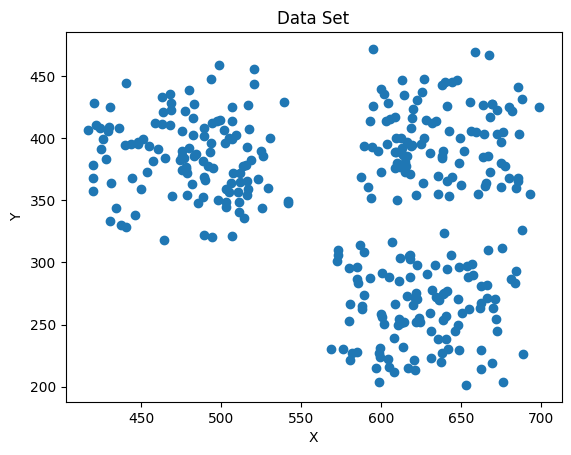

In [3]:
#plot the dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### DBSCAN
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that identifies clusters based on the density of points in a dataset. It groups together points that are closely packed (points within a specified distance, called epsilon) and marks points in low-density regions as outliers. DBSCAN does not require specifying the number of clusters in advance and is effective in finding clusters of arbitrary shape. Key parameters include epsilon (maximum distance between points in a cluster) and MinPts (minimum number of points to form a dense region).


In [5]:
# initialize and fit the HDBSCAN model and evaluate the model to find the best parameters
def evaluate_DBSCAN(data, eps_list: list)->tuple:
    silhouette,davies_bouldin,calinski_harabasz = [],[],[]
    for eps in eps_list:
        
        DBS_model = DBSCAN(eps=eps, min_samples=2, metric='euclidean')
        cluster_labels = DBS_model.fit(data).labels_
        silhouette.append(round(silhouette_score(data, cluster_labels),4))
        davies_bouldin.append(round(davies_bouldin_score(data, cluster_labels),4))
        calinski_harabasz.append(round(calinski_harabasz_score(data, cluster_labels),4))
    return (silhouette,davies_bouldin,calinski_harabasz)

In [6]:
eps_list = range(2,30,2)
results = evaluate_DBSCAN(data, eps_list)

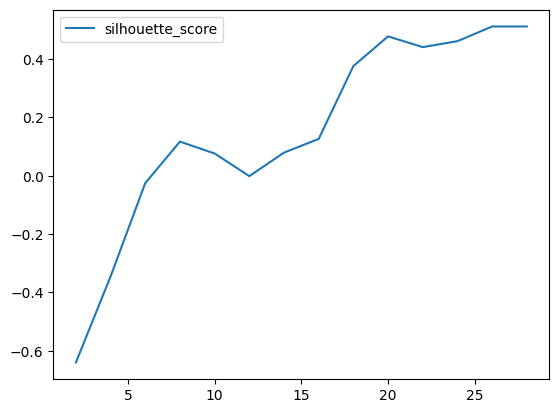

In [7]:
"""The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 
It ranges from -1 to 1, where higher values indicate better clustering."""

plt.plot(eps_list,results[0],label='silhouette_score')
plt.legend()
plt.show()

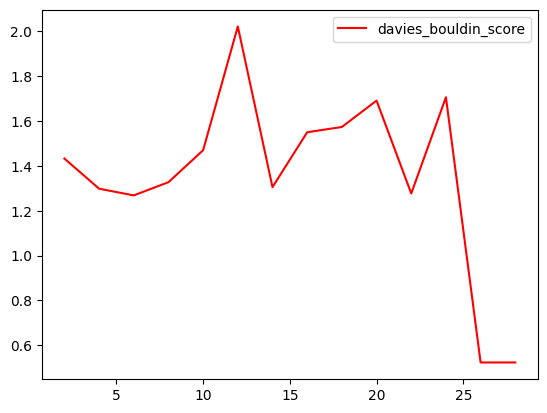

In [8]:
"""The Davies-Bouldin Index is the average similarity ratio of each cluster with 
its most similar cluster, where lower values indicate better clustering."""

plt.plot(eps_list,results[1],label='davies_bouldin_score',color='red')
plt.legend()
plt.show()

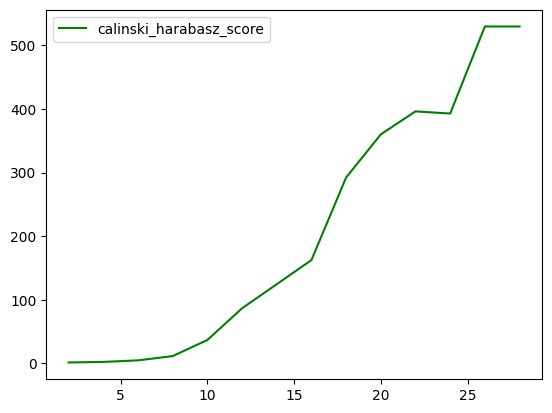

In [9]:
"""The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is the ratio of 
the sum of between-cluster dispersion and within-cluster dispersion. Higher values indicate better clustering."""

plt.plot(eps_list,results[2],label='calinski_harabasz_score',color='green')
plt.legend()
plt.show()

In [10]:
# based on the results the optimal number of eps is  26
cluster = DBSCAN(eps=26, min_samples=2, metric='euclidean')
cluster_labels = cluster.fit_predict(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster_labels),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster_labels),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster_labels),4))

the best silhouette_score = 0.5119
the best davies_bouldin_score = 0.5233
the best calinski_harabasz_score = 529.5766


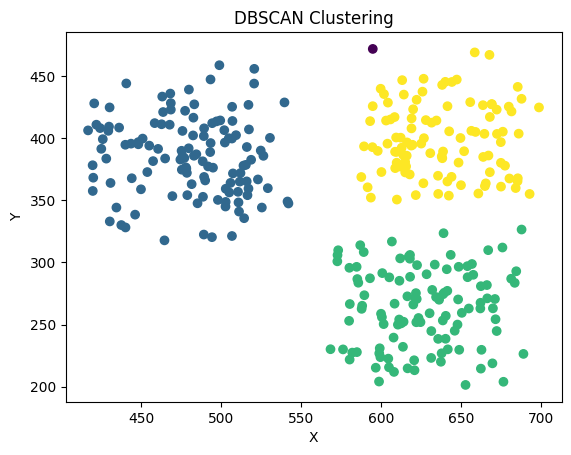

In [11]:
# plot the cluster 

plt.scatter(data['X'],data['Y'],c=cluster_labels)
plt.title('DBSCAN Clustering')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()